In [14]:
#Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [15]:
DF = pd.read_pickle (r'/Users/winsontom/Desktop/10-2023 Instacart Basket Analysis/02 Data /Prepared Data/Task 10 - step 4.pkl') 

In [3]:
pd.set_option('display.max_columns', None)
DF.head(10)

,Order_ID,User_ID,Order_Number,Order_Days_Of_Week,Order_Hours,Days_Since_Prior_Order,Product_ID,Add_To_Cart_Order,Reordered,Product_Name,Aisle_ID,Department_ID,Prices,Price_Range_Loc,Busiest_Day,Busiest_Period_Of_Day,Max_Order,Loyalty_Flag,Average_Price_Of_Orders,Spender_Type,Customer_Frequency,Median_days_since_prior_order,Gender,State,Age,Date_Joined,N_Dependants,Fam_Status,Income,Region,Activity_Level
0,2539329,1,1,2,8,0.0,196,1,0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Average Orders,10,New customer,6.367797,Low Spender,Regular Customer,20.0,Female,Alabama,31,2/17/2019,3,married,40423,South,Active
1,2539329,1,1,2,8,0.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,Mid-range product,Regularly busy,Average Orders,10,New customer,6.367797,Low Spender,Regular Customer,20.0,Female,Alabama,31,2/17/2019,3,married,40423,South,Active
2,2539329,1,1,2,8,0.0,12427,3,0,Original Beef Jerky,23.0,19.0,4.4,Low-range product,Regularly busy,Average Orders,10,New customer,6.367797,Low Spender,Regular Customer,20.0,Female,Alabama,31,2/17/2019,3,married,40423,South,Active
3,2539329,1,1,2,8,0.0,26088,4,0,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low-range product,Regularly busy,Average Orders,10,New customer,6.367797,Low Spender,Regular Customer,20.0,Female,Alabama,31,2/17/2019,3,married,40423,South,Active
4,2539329,1,1,2,8,0.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,Low-range product,Regularly busy,Average Orders,10,New customer,6.367797,Low Spender,Regular Customer,20.0,Female,Alabama,31,2/17/2019,3,married,40423,South,Active
5,2398795,1,2,3,7,15.0,196,1,1,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Average Orders,10,New customer,6.367797,Low Spender,Regular Customer,20.0,Female,Alabama,31,2/17/2019,3,married,40423,South,Active
6,2398795,1,2,3,7,15.0,10258,2,0,Pistachios,117.0,19.0,3.0,Low-range product,Regularly busy,Average Orders,10,New customer,6.367797,Low Spender,Regular Customer,20.0,Female,Alabama,31,2/17/2019,3,married,40423,South,Active
7,2398795,1,2,3,7,15.0,12427,3,1,Original Beef Jerky,23.0,19.0,4.4,Low-range product,Regularly busy,Average Orders,10,New customer,6.367797,Low Spender,Regular Customer,20.0,Female,Alabama,31,2/17/2019,3,married,40423,South,Active
8,2398795,1,2,3,7,15.0,13176,4,0,Bag of Organic Bananas,24.0,4.0,10.3,Mid-range product,Regularly busy,Average Orders,10,New customer,6.367797,Low Spender,Regular Customer,20.0,Female,Alabama,31,2/17/2019,3,married,40423,South,Active
9,2398795,1,2,3,7,15.0,26088,5,1,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low-range product,Regularly busy,Average Orders,10,New customer,6.367797,Low Spender,Regular Customer,20.0,Female,Alabama,31,2/17/2019,3,married,40423,South,Active


In [4]:
DF['Department_ID']

0            7.0
1           16.0
2           19.0
3           19.0
4           17.0
            ... 
32435054     9.0
32435055    19.0
32435056    19.0
32435057    19.0
32435058    19.0
Name: Department_ID, Length: 30171430, dtype: float64

In [5]:
pd.options.display.max_rows = None
DF[['Department_ID','Order_Days_Of_Week','Order_Hours','Product_Name','Gender','Age','Income']].head(100)

,Department_ID,Order_Days_Of_Week,Order_Hours,Product_Name,Gender,Age,Income
0,7.0,2,8,Soda,Female,31,40423
1,16.0,2,8,Organic Unsweetened Vanilla Almond Milk,Female,31,40423
2,19.0,2,8,Original Beef Jerky,Female,31,40423
3,19.0,2,8,Aged White Cheddar Popcorn,Female,31,40423
4,17.0,2,8,XL Pick-A-Size Paper Towel Rolls,Female,31,40423
5,7.0,3,7,Soda,Female,31,40423
6,19.0,3,7,Pistachios,Female,31,40423
7,19.0,3,7,Original Beef Jerky,Female,31,40423
8,4.0,3,7,Bag of Organic Bananas,Female,31,40423
9,19.0,3,7,Aged White Cheddar Popcorn,Female,31,40423


In [6]:
pd.options.display.max_rows = None
DF[['Product_Name','Average_Price_Of_Orders','Gender','Age','Income','Fam_Status','N_Dependants']].head(1000)

,Product_Name,Average_Price_Of_Orders,Gender,Age,Income,Fam_Status,N_Dependants
0,Soda,6.367797,Female,31,40423,married,3
1,Organic Unsweetened Vanilla Almond Milk,6.367797,Female,31,40423,married,3
2,Original Beef Jerky,6.367797,Female,31,40423,married,3
3,Aged White Cheddar Popcorn,6.367797,Female,31,40423,married,3
4,XL Pick-A-Size Paper Towel Rolls,6.367797,Female,31,40423,married,3
5,Soda,6.367797,Female,31,40423,married,3
6,Pistachios,6.367797,Female,31,40423,married,3
7,Original Beef Jerky,6.367797,Female,31,40423,married,3
8,Bag of Organic Bananas,6.367797,Female,31,40423,married,3
9,Aged White Cheddar Popcorn,6.367797,Female,31,40423,married,3


# Step 5 - Instacart customer profiling based on age, income, certain goods in the “department_id” column and number of dependents. 

In [8]:
#Interpreting step 5 is create a "flag" column that profiles each row's household situation 
#Age, income, goods purchased, Average Price of Orders, Max Orders, and when they shop.
#There are alot of potential situations but I am going to profile it general categories such as age/kids or no kids
#as the primary differentiation between categories. Therefore the 4 categories will be:

#1. Junior (Anyone 23 and under)
#2. Adults without dependants (Anyone 23+ to 64 years old without kids)
#3. Adults with dependants (Anyone 23+ to 64 years old with kids)
#4. Senior (65 years and over)

In [30]:
#Conditions of a junior using LOC
#Age is the only category here not kids or no kids, married or not married
#Generally young people's spending will be more similar

DF.loc[DF['Age'] <= 23, 'Profile'] = "Junior"

/var/folders/yj/v30db1v90zs0p0pvttp796cm0000gp/T/ipykernel_5521/671302283.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Junior' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  DF.loc[DF['Age'] <= 23, 'Profile'] = "Junior"


In [31]:
DF.loc[(DF['Age'] > 23) &  (DF['Age'] < 65)& (DF['N_Dependants'] == 0), 'Profile'] = "Adult without dependants"

In [32]:
DF.loc[(DF['Age'] > 23) &   (DF['Age'] < 65)& (DF['N_Dependants'] > 0), 'Profile'] = "Adult with dependants"

In [33]:
DF.loc[DF['Age'] >=65, 'Profile'] = "Senior"

In [34]:
#Checking to see if 'Profile' column we created has the accurate inputs. - It is accurate
DF.tail(10)

,Order_ID,User_ID,Order_Number,Order_Days_Of_Week,Order_Hours,Days_Since_Prior_Order,Product_ID,Add_To_Cart_Order,Reordered,Product_Name,Aisle_ID,Department_ID,Prices,Price_Range_Loc,Busiest_Day,Busiest_Period_Of_Day,Max_Order,Loyalty_Flag,Average_Price_Of_Orders,Spender_Type,Customer_Frequency,Median_days_since_prior_order,Gender,State,Age,Date_Joined,N_Dependants,Fam_Status,Income,Region,Activity_Level,Total Spending,Profile
32435049,626363,206209,12,1,12,18.0,14727,20,0,Yellow Onion,123.0,4.0,3.2,Low-range product,Regularly busy,Average Orders,13,Regular customer,7.058915,Low Spender,Regular Customer,18.0,Female,Iowa,74,9/14/2019,3,married,137969,Midwest,Active,910.6,Senior
32435050,2977660,206209,13,1,12,7.0,24852,1,1,Banana,24.0,4.0,12.3,Mid-range product,Regularly busy,Average Orders,13,Regular customer,7.058915,Low Spender,Regular Customer,18.0,Female,Iowa,74,9/14/2019,3,married,137969,Midwest,Active,910.6,Senior
32435051,2977660,206209,13,1,12,7.0,9405,2,1,Calcium Enriched 100% Lactose Free Fat Free Milk,91.0,16.0,11.5,Mid-range product,Regularly busy,Average Orders,13,Regular customer,7.058915,Low Spender,Regular Customer,18.0,Female,Iowa,74,9/14/2019,3,married,137969,Midwest,Active,910.6,Senior
32435052,2977660,206209,13,1,12,7.0,16168,3,1,Large Organic Omega3 Brown Eggs,86.0,16.0,11.8,Mid-range product,Regularly busy,Average Orders,13,Regular customer,7.058915,Low Spender,Regular Customer,18.0,Female,Iowa,74,9/14/2019,3,married,137969,Midwest,Active,910.6,Senior
32435053,2977660,206209,13,1,12,7.0,39216,4,0,Original Multigrain Spoonfuls Cereal,121.0,14.0,3.3,Low-range product,Regularly busy,Average Orders,13,Regular customer,7.058915,Low Spender,Regular Customer,18.0,Female,Iowa,74,9/14/2019,3,married,137969,Midwest,Active,910.6,Senior
32435054,2977660,206209,13,1,12,7.0,14197,5,1,Tomato Paste,9.0,9.0,5.6,Mid-range product,Regularly busy,Average Orders,13,Regular customer,7.058915,Low Spender,Regular Customer,18.0,Female,Iowa,74,9/14/2019,3,married,137969,Midwest,Active,910.6,Senior
32435055,2977660,206209,13,1,12,7.0,38730,6,0,Brownie Crunch High Protein Bar,3.0,19.0,5.9,Mid-range product,Regularly busy,Average Orders,13,Regular customer,7.058915,Low Spender,Regular Customer,18.0,Female,Iowa,74,9/14/2019,3,married,137969,Midwest,Active,910.6,Senior
32435056,2977660,206209,13,1,12,7.0,31477,7,0,High Protein Bar Chunky Peanut Butter,3.0,19.0,4.2,Low-range product,Regularly busy,Average Orders,13,Regular customer,7.058915,Low Spender,Regular Customer,18.0,Female,Iowa,74,9/14/2019,3,married,137969,Midwest,Active,910.6,Senior
32435057,2977660,206209,13,1,12,7.0,6567,8,0,Chocolate Peanut Butter Protein Bar,3.0,19.0,4.9,Low-range product,Regularly busy,Average Orders,13,Regular customer,7.058915,Low Spender,Regular Customer,18.0,Female,Iowa,74,9/14/2019,3,married,137969,Midwest,Active,910.6,Senior
32435058,2977660,206209,13,1,12,7.0,22920,9,0,Roasted & Salted Shelled Pistachios,117.0,19.0,1.7,Low-range product,Regularly busy,Average Orders,13,Regular customer,7.058915,Low Spender,Regular Customer,18.0,Female,Iowa,74,9/14/2019,3,married,137969,Midwest,Active,910.6,Senior


In [35]:
#Frequency breakdown of Profile column
#How many juniors, adults with dependants, adults without dependants, and seniors
DF['Profile'].value_counts(dropna = False)

Profile
Adult with dependants       14454677
Senior                       7989725
Adult without dependants     4872997
Junior                       2854031
Name: count, dtype: int64

In [15]:
#Step 5 - Profile is complete which focuses on age/maritial status.
#This does leave some more to be desired. 
#Income and "Goods in Department_ID" column should be looked into

#Lets Identify what each department ID number means - previously this was in, but seems to have been mistakenly taken out.

In [16]:
DF['Department_ID'].value_counts(dropna = False)

Department_ID
4.0     8859947
16.0    5053441
19.0    2699351
7.0     2507241
1.0     2059326
13.0    1732114
3.0     1092488
15.0     982041
20.0     978050
9.0      797683
17.0     678296
12.0     655729
14.0     653419
11.0     411807
18.0     403066
6.0      248722
5.0      139573
8.0       90339
21.0      62541
2.0       33415
10.0      32841
Name: count, dtype: int64

In [17]:
#Make a new "Department" column.
#Fill it with the string Values for now
DF['Department'] = 'Values'

In [18]:
#Check we made this column
DF.columns

Index(['Order_ID', 'User_ID', 'Order_Number', 'Order_Days_Of_Week',
       'Order_Hours', 'Days_Since_Prior_Order', 'Product_ID',
       'Add_To_Cart_Order', 'Reordered', 'Product_Name', 'Aisle_ID',
       'Department_ID', 'Prices', 'Price_Range_Loc', 'Busiest_Day',
       'Busiest_Period_Of_Day', 'Max_Order', 'Loyalty_Flag',
       'Average_Price_Of_Orders', 'Spender_Type', 'Customer_Frequency',
       'Median_days_since_prior_order', 'Gender', 'State', 'Age',
       'Date_Joined', 'N_Dependants', 'Fam_Status', 'Income', 'Region',
       'Activity_Level', 'Profile', 'Department'],
      dtype='object')

In [26]:
DF.loc[DF['Department_ID'] == 1, 'Department'] = 'Frozen'
DF.loc[DF['Department_ID'] == 2, 'Department'] = 'Other'
DF.loc[DF['Department_ID'] == 3, 'Department'] = 'Bakery'
DF.loc[DF['Department_ID'] == 4, 'Department'] = 'Produce'
DF.loc[DF['Department_ID'] == 5, 'Department'] = 'Alcohol'
DF.loc[DF['Department_ID'] == 6, 'Department'] = 'International'
DF.loc[DF['Department_ID'] == 7, 'Department'] = 'Beverages'
DF.loc[DF['Department_ID'] == 8, 'Department'] = 'Pets'
DF.loc[DF['Department_ID'] == 9, 'Department'] = 'Dry Goods Pasta'
DF.loc[DF['Department_ID'] == 10, 'Department'] = 'Bulk'
DF.loc[DF['Department_ID'] == 11, 'Department'] = 'Personal Care'
DF.loc[DF['Department_ID'] == 12, 'Department'] = 'Meat Seafood'
DF.loc[DF['Department_ID'] == 13, 'Department'] = 'Pantry'
DF.loc[DF['Department_ID'] == 14, 'Department'] = 'Breakfast'
DF.loc[DF['Department_ID'] == 15, 'Department'] = 'Canned Goods'
DF.loc[DF['Department_ID'] == 16, 'Department'] = 'Dairy Eggs'
DF.loc[DF['Department_ID'] == 17, 'Department'] = 'Household'
DF.loc[DF['Department_ID'] == 18, 'Department'] = 'Babies'
DF.loc[DF['Department_ID'] == 19, 'Department'] = 'Snacks'
DF.loc[DF['Department_ID'] == 20, 'Department'] = 'Deli'
DF.loc[DF['Department_ID'] == 21, 'Department'] = 'Missing'

/var/folders/yj/v30db1v90zs0p0pvttp796cm0000gp/T/ipykernel_21088/1726779992.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Frozen' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  DF.loc[DF['Department_ID'] == 1, 'Department'] = 'Frozen'


In [27]:
DF.head(50)

,Order_ID,User_ID,Order_Number,Order_Days_Of_Week,Order_Hours,Days_Since_Prior_Order,Product_ID,Add_To_Cart_Order,Reordered,Product_Name,...,State,Age,Date_Joined,N_Dependants,Fam_Status,Income,Region,Activity_Level,Income Group,Department
0,2539329,1,1,2,8,0.000,196,1,0,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,Active,Lower Income,Beverages
1,2539329,1,1,2,8,0.000,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Alabama,31,2/17/2019,3,married,40423,South,Active,Lower Income,Dairy Eggs
2,2539329,1,1,2,8,0.000,12427,3,0,Original Beef Jerky,...,Alabama,31,2/17/2019,3,married,40423,South,Active,Lower Income,Snacks
3,2539329,1,1,2,8,0.000,26088,4,0,Aged White Cheddar Popcorn,...,Alabama,31,2/17/2019,3,married,40423,South,Active,Lower Income,Snacks
4,2539329,1,1,2,8,0.000,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Alabama,31,2/17/2019,3,married,40423,South,Active,Lower Income,Household
5,2398795,1,2,3,7,15.000,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,Active,Lower Income,Beverages
6,2398795,1,2,3,7,15.000,10258,2,0,Pistachios,...,Alabama,31,2/17/2019,3,married,40423,South,Active,Lower Income,Snacks
7,2398795,1,2,3,7,15.000,12427,3,1,Original Beef Jerky,...,Alabama,31,2/17/2019,3,married,40423,South,Active,Lower Income,Snacks
8,2398795,1,2,3,7,15.000,13176,4,0,Bag of Organic Bananas,...,Alabama,31,2/17/2019,3,married,40423,South,Active,Lower Income,Produce
9,2398795,1,2,3,7,15.000,26088,5,1,Aged White Cheddar Popcorn,...,Alabama,31,2/17/2019,3,married,40423,South,Active,Lower Income,Snacks


In [28]:
DF['Department'].value_counts(dropna = False)

Department
Produce            8859947
Dairy Eggs         5053441
Snacks             2699351
Beverages          2507241
Frozen             2059326
Pantry             1732114
Bakery             1092488
Canned Goods        982041
Deli                978050
Dry Goods Pasta     797683
Household           678296
Meat Seafood        655729
Breakfast           653419
Personal Care       411807
Babies              403066
International       248722
Alcohol             139573
Pets                 90339
Missing              62541
Other                33415
Bulk                 32841
Name: count, dtype: int64

In [22]:
#Step 5 specifically saids "certain goods in the “department_id” column" rather than all goods in the deparment ID.
#It is most likely that all users buy produce for example, but not all users would buy pet food. Therefore there
#is a distinction between pet food consumers vs no pet food consumers. Similar idea with baby, alcohol.


#Some "seperating profiles" I would use to differentiate users are 
#Profile 2 - Baby food or no Baby Food
#Profile 3 - Alcohol or No Alcohol
#Profile 4 - Pet or No Pet

#*Reminder Profile = Age and Dependant status

In [23]:
#Creating the additional Profiling columns
#Profile 2 - Baby food or no Baby Food
#Profile 3 - Alcohol or No Alcohol
#Profile 4 - Pet or No Pet

In [29]:
DF['Profile 2'] = 'Values'

In [30]:
DF.loc[DF['Department'] == 'Babies', 'Profile 2'] = "Babies"

In [31]:
DF['Profile 2'].value_counts(dropna = False)

Profile 2
Values    29768364
Babies      403066
Name: count, dtype: int64

In [32]:
DF.loc[DF['Department'] != 'Babies', 'Profile 2'] = "No Babies"

In [33]:
#Profile 2 - Babies or No Babies is now complete. 
#Those users 
DF['Profile 2'].value_counts(dropna = False)

Profile 2
No Babies    29768364
Babies         403066
Name: count, dtype: int64

In [34]:
#Problem with this is that not every purchase is going to be Babies. 
#User __ can buy baby food in one order and none in the other, however that user should have "baby"
#We need to do LOC with 2 conditions
DF['Profile 2'].tail(1000)

32434059    No Babies
32434060    No Babies
32434061    No Babies
32434062    No Babies
32434063    No Babies
              ...    
32435054    No Babies
32435055    No Babies
32435056    No Babies
32435057    No Babies
32435058    No Babies
Name: Profile 2, Length: 1000, dtype: object

In [35]:
DF['Profile 3'] = 'Values'

In [36]:
DF.loc[DF['Department'] == 'Alcohol', 'Profile 3'] = "Alcohol Consumer"

In [37]:
DF.loc[DF['Department'] != 'Alcohol', 'Profile 3'] = "Non Alcohol Consumer"

In [38]:
DF['Profile 3'].value_counts(dropna = False)

Profile 3
Non Alcohol Consumer    30031857
Alcohol Consumer          139573
Name: count, dtype: int64

In [39]:
DF['Profile 4'] = 'Values'

In [40]:
DF.loc[DF['Department_ID'] == 8, 'Profile 4'] = "Pet Owner"

In [41]:
DF.loc[DF['Department_ID'] != 8, 'Profile 4'] = "Not Pet Owner"

In [42]:
DF['Profile 4'].value_counts(dropna = False)

Profile 4
Not Pet Owner    30081091
Pet Owner           90339
Name: count, dtype: int64

In [44]:
DF[DF['Profile 2'] == 'Babies'].head(100)

,Order_ID,User_ID,Order_Number,Order_Days_Of_Week,Order_Hours,Days_Since_Prior_Order,Product_ID,Add_To_Cart_Order,Reordered,Product_Name,...,N_Dependants,Fam_Status,Income,Region,Activity_Level,Income Group,Department,Profile 2,Profile 3,Profile 4
4527,1354506,37,3,0,1,8.000,17170,12,0,Little Yums Pumpkin and Banana Teething Wafers,...,2,married,123773,South,Active,Average Income,Babies,Babies,Non Alcohol Consumer,Not Pet Owner
4535,2449761,37,5,2,14,8.000,17170,2,1,Little Yums Pumpkin and Banana Teething Wafers,...,2,married,123773,South,Active,Average Income,Babies,Babies,Non Alcohol Consumer,Not Pet Owner
4544,484397,37,6,5,17,10.000,39748,4,0,Organic Whole Grain Infant Oatmeal Cereal with...,...,2,married,123773,South,Active,Average Income,Babies,Babies,Non Alcohol Consumer,Not Pet Owner
4562,2568429,37,7,1,19,10.000,39748,8,1,Organic Whole Grain Infant Oatmeal Cereal with...,...,2,married,123773,South,Active,Average Income,Babies,Babies,Non Alcohol Consumer,Not Pet Owner
4563,2568429,37,7,1,19,10.000,17170,9,1,Little Yums Pumpkin and Banana Teething Wafers,...,2,married,123773,South,Active,Average Income,Babies,Babies,Non Alcohol Consumer,Not Pet Owner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17674,888081,140,58,0,17,1.000,46807,7,1,"Bananas, Raspberries & Oats Organic Baby Food",...,0,divorced/widowed,67493,Midwest,Active,Average Income,Babies,Babies,Non Alcohol Consumer,Not Pet Owner
17675,888081,140,58,0,17,1.000,44672,8,1,Organic Baby Food Creamy Vegetables with Chicken,...,0,divorced/widowed,67493,Midwest,Active,Average Income,Babies,Babies,Non Alcohol Consumer,Not Pet Owner
17676,888081,140,58,0,17,1.000,12020,9,1,"Mighty 4 Sweet Potato, Blueberry, Millet & Gre...",...,0,divorced/widowed,67493,Midwest,Active,Average Income,Babies,Babies,Non Alcohol Consumer,Not Pet Owner
17677,888081,140,58,0,17,1.000,37003,10,0,"Organic Apples, Carrots and Parsnips Puree",...,0,divorced/widowed,67493,Midwest,Active,Average Income,Babies,Babies,Non Alcohol Consumer,Not Pet Owner


In [45]:
#Renaming Profile(s) and what they mean for clarity 
#These are the "Profile(s)" just with more clarity on what they represent

DF.rename(columns = {'Profile' : 'Customer Identity'}, inplace = True)
DF.rename(columns = {'Profile 2' : 'Baby Food Purchase'}, inplace = True)
DF.rename(columns = {'Profile 3' : 'Alcohol Purchase'}, inplace = True)
DF.rename(columns = {'Profile 4' : 'Pet Food Purchase'}, inplace = True)

In [47]:
DF.columns

Index(['Order_ID', 'User_ID', 'Order_Number', 'Order_Days_Of_Week',
       'Order_Hours', 'Days_Since_Prior_Order', 'Product_ID',
       'Add_To_Cart_Order', 'Reordered', 'Product_Name', 'Aisle_ID',
       'Department_ID', 'Prices', 'Price_Range_Loc', 'Busiest_Day',
       'Busiest_Period_Of_Day', 'Max_Order', 'Loyalty_Flag',
       'Average_Price_Of_Orders', 'Spender_Type', 'Customer_Frequency',
       'Median_days_since_prior_order', 'Gender', 'State', 'Age',
       'Date_Joined', 'N_Dependants', 'Fam_Status', 'Income', 'Region',
       'Activity_Level', 'Income Group', 'Department', 'Baby Food Purchase',
       'Alcohol Purchase', 'Pet Food Purchase'],
      dtype='object')

# Step 6 - Customer Identity Visualization 
# "What is the age of our customers?"
# "Who are our customers? Do they have dependants?"

<Axes: xlabel='Profile'>

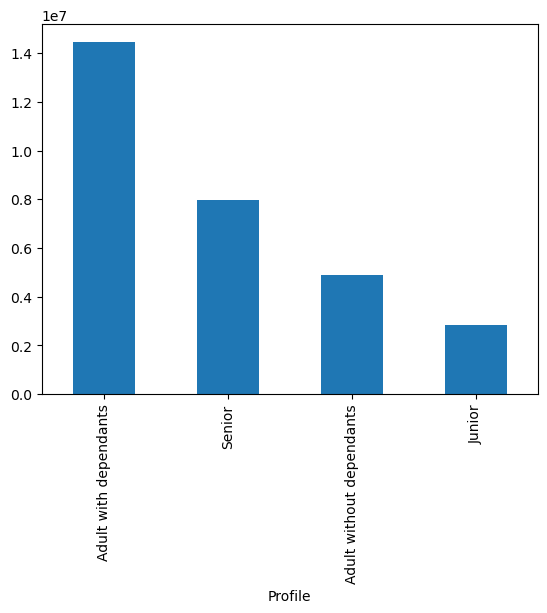

In [14]:
#Visualizations of Profiles we created - Step 6
#Comparing customers to see ratio of adults with dependants, seniors, adults without dependants, and junior

DF['Profile'].value_counts().plot.bar()

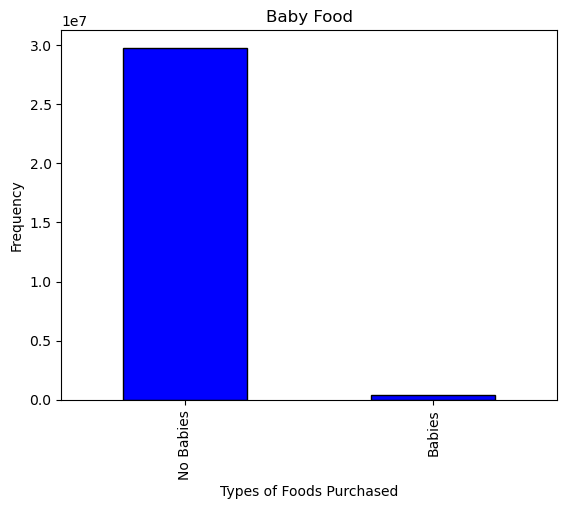

In [49]:
#Visualizations of Profiles we created - Step 6
#Comparing purchases which are baby food and not baby food

DF['Baby Food Purchase'].value_counts()[:100].plot.bar(title='Baby Food', xlabel='Types of Foods Purchased', ylabel='Frequency', color='Blue', edgecolor='black')
plt.show()

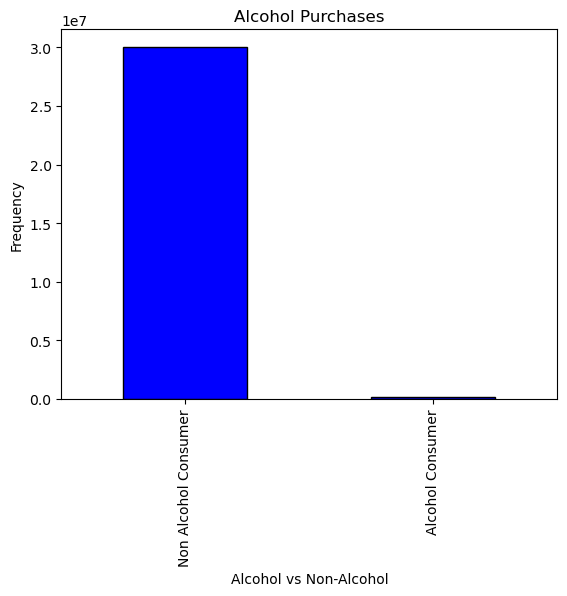

In [51]:
#Visualizations of Profiles we created - Step 6
#Comparing Alcohol Purchases versus not Purchases

DF['Alcohol Purchase'].value_counts()[:100].plot.bar(title='Alcohol Purchases', xlabel='Alcohol vs Non-Alcohol', ylabel='Frequency', color='Blue', edgecolor='black')
plt.show()

<Axes: xlabel='Pet Food Purchase'>

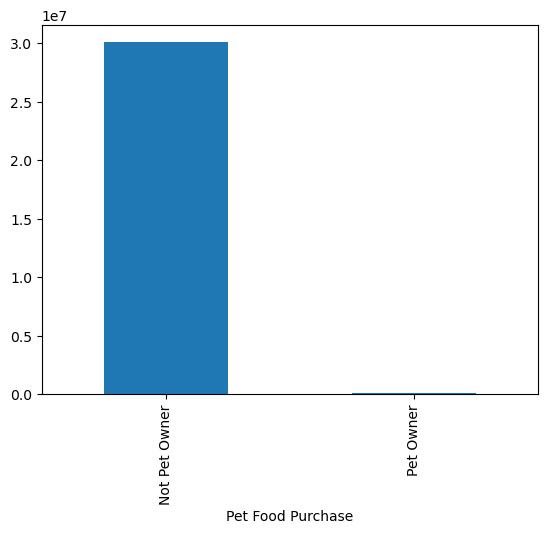

In [45]:
#Visualizations of Profiles we created - Step 6
#Comparing Alcohol Purchases versus not Purchases

DF['Pet Food Purchase'].value_counts().plot.bar()

# Step 7 - Aggregate the max, mean, and min variables on a customer-profile level for usage frequency & expenditure


In [6]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [7]:
DF['Income'].describe()

count   30171430.000
mean       99770.208
std        43183.415
min        25903.000
25%        67424.000
50%        96823.000
75%       128150.000
max       593901.000
Name: Income, dtype: float64

In [ ]:
#Average income is 99,770
#Median income is 96,823

In [ ]:
#Creating new column for Income Level of each User

In [8]:
DF.loc[(DF['Income'] <=67424), 'Income Group'] = 'Lower Income'
DF.loc[(DF['Income'] > 67424) & (DF['Income'] < 128150), 'Income Group'] = 'Average Income'
DF.loc[(DF['Income'] >= 128150), 'Income Group'] = 'High Income'

/var/folders/yj/v30db1v90zs0p0pvttp796cm0000gp/T/ipykernel_21088/2140959027.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Lower Income' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  DF.loc[(DF['Income'] <=67424), 'Income Group'] = 'Lower Income'


In [10]:
#Checking if successful in the creation of income group column

DF['Income Group'].head(100)

0     Lower Income
1     Lower Income
2     Lower Income
3     Lower Income
4     Lower Income
          ...     
95    Lower Income
96    Lower Income
97    Lower Income
98    Lower Income
99    Lower Income
Name: Income Group, Length: 100, dtype: object

In [11]:
#Quick Frequency check on the Income Group
DF['Income Group'].value_counts(dropna = False)

Income Group
Average Income    15084327
High Income        7543711
Lower Income       7543392
Name: count, dtype: int64

In [17]:
#Customer Expenditure - Mean, Max, Min
#For each income group, what is the average price of orders - defined by the average, max, and min. OF that group
DF.groupby('Income Group').agg({'Average_Price_Of_Orders': ['mean','max','min']})

Average_Price_Of_Orders                
                                  mean       max   min
Income Group                                          
Average Income                   9.212  5135.894 7.000
High Income                     21.691 15006.940 7.000
Lower Income                     7.316    22.257 1.000

# Step 8- Compare customer in regions and departments. Using Group By

#Identify a link between them.Customers may demonstrate different behaviors across regions Pull critical shopper information seperated by region.


In [46]:
#First isolate the 4 different columns we are talking about
#1 is User_ID , 2 is Department_ID, 3 is Department, 4 is Region

DF[['User_ID', 'Department_ID', 'Department','Region']].head(10)

,User_ID,Department_ID,Department,Region
0,1,7.0,Beverages,South
1,1,16.0,Dairy Eggs,South
2,1,19.0,Snacks,South
3,1,19.0,Snacks,South
4,1,17.0,Household,South
5,1,7.0,Beverages,South
6,1,19.0,Snacks,South
7,1,19.0,Snacks,South
8,1,4.0,Produce,South
9,1,19.0,Snacks,South


In [49]:
#What Department is most popular within each region?
#All Regions most popular department is produce
#This is a bit obvious and underwhelming so lets find out more

DF.groupby(['Region'])['Department'].agg(pd.Series.mode)

Region
Midwest      Produce
Northeast    Produce
South        Produce
West         Produce
Name: Department, dtype: object

In [48]:
#What Department is least popular within each region?
#Alcohol is the least purchased in every region
#Once again not the most differentiating results

DF.groupby(['Region'])['Department'].agg(pd.Series.min)

Region
Midwest      Alcohol
Northeast    Alcohol
South        Alcohol
West         Alcohol
Name: Department, dtype: object

In [50]:
#What is the average prices spent within each region?
#Average Prices of items bought per region

DF.groupby('Region').agg({'Prices': ['mean',]})

,Prices
,mean
Region,
Midwest,12.656311
Northeast,11.420964
South,12.108931
West,11.102326


In [51]:
DF['Max_Price'] = DF.groupby(['User_ID'])['Prices'].transform(np.max)

/var/folders/yj/v30db1v90zs0p0pvttp796cm0000gp/T/ipykernel_823/2468564746.py:1: FutureWarning: The provided callable <function amax at 0x107b7d4e0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  DF['Max_Price'] = DF.groupby(['User_ID'])['Prices'].transform(np.max)


In [52]:
DF.columns

Index(['Order_ID', 'User_ID', 'Order_Number', 'Order_Days_Of_Week',
       'Order_Hours', 'Days_Since_Prior_Order', 'Product_ID',
       'Add_To_Cart_Order', 'Reordered', 'Product_Name', 'Aisle_ID',
       'Department_ID', 'Prices', 'Price_Range_Loc', 'Busiest_Day',
       'Busiest_Period_Of_Day', 'Max_Order', 'Loyalty_Flag',
       'Average_Price_Of_Orders', 'Spender_Type', 'Customer_Frequency',
       'Median_days_since_prior_order', 'Gender', 'State', 'Age',
       'Date_Joined', 'N_Dependants', 'Fam_Status', 'Income', 'Region',
       'Activity_Level', 'Customer Identity', 'Department',
       'Baby Food Purchase', 'Alcohol Purchase', 'Pet Food Purchase',
       'Max_Price'],
      dtype='object')

In [53]:
#Which Region spends the most on Average?
#Created a Max price column to seperate each users max price they bought
#Then group by- mean - to find each regions maximum pricing

DF.groupby(['Region'])['Max_Price'].mean()

Region
Midwest      468.969566
Northeast    414.420040
South        425.978893
West         389.127438
Name: Max_Price, dtype: float64

In [55]:
#Which Price range is most frequently bought in each region?

DF.groupby(['Region'])['Price_Range_Loc'].agg(pd.Series.mode)

Region
Midwest      Mid-range product
Northeast    Mid-range product
South        Mid-range product
West         Mid-range product
Name: Price_Range_Loc, dtype: object

In [54]:
#What is the average income of each region?
#Which region's average income is highest?

DF.groupby(['Region'])['Income'].mean()

Region
Midwest      100474.199015
Northeast     99863.532796
South         99343.438738
West          99616.831341
Name: Income, dtype: float64

In [55]:
#How old is the average shopper from each region?
#"How old is the average Southern shopper?"

DF.groupby(['Region'])['Age'].agg(pd.Series.mode)

Region
Midwest      47
Northeast    49
South        79
West         48
Name: Age, dtype: int64

In [56]:
#Whats the most common Average Price of Orders in each region? 
#Perhaps each region, has different shopping frequencies that impact average price of order?
#Midwest rather having bigger orders than the West for example

DF.groupby(['Region'])['Average_Price_Of_Orders'].agg(pd.Series.mode)

Region
Midwest      7.126053
Northeast    7.441326
South        6.683283
West         6.884899
Name: Average_Price_Of_Orders, dtype: float64

In [ ]:
#Step 9 - Suitable charts for the results in Step 8

#Aggregate using transform function
#Then use this new column to create a chart to compare Regions and pricing

In [62]:
DF['Regional Average Prices'] = 'Values'

In [64]:
DF['Regional Average Prices'] = DF.groupby(['Region'])['Prices'].transform(np.mean)

/var/folders/yj/v30db1v90zs0p0pvttp796cm0000gp/T/ipykernel_823/2761271684.py:1: FutureWarning: The provided callable <function mean at 0x107b7e200> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  DF['Regional Average Prices'] = DF.groupby(['Region'])['Prices'].transform(np.mean)


In [68]:
DF['Regional Average Prices'].head(100)

0     12.108931
1     12.108931
2     12.108931
3     12.108931
4     12.108931
5     12.108931
6     12.108931
7     12.108931
8     12.108931
9     12.108931
10    12.108931
11    12.108931
12    12.108931
13    12.108931
14    12.108931
15    12.108931
16    12.108931
17    12.108931
18    12.108931
19    12.108931
20    12.108931
21    12.108931
22    12.108931
23    12.108931
24    12.108931
25    12.108931
26    12.108931
27    12.108931
28    12.108931
29    12.108931
30    12.108931
31    12.108931
32    12.108931
33    12.108931
34    12.108931
35    12.108931
36    12.108931
37    12.108931
38    12.108931
39    12.108931
40    12.108931
41    12.108931
42    12.108931
43    12.108931
44    12.108931
45    12.108931
46    12.108931
47    12.108931
48    12.108931
49    12.108931
50    12.108931
51    12.108931
52    12.108931
53    12.108931
54    12.108931
55    12.108931
56    12.108931
57    12.108931
58    12.108931
59    11.102326
60    11.102326
61    11.102326
62    11

Text(0, 0.5, 'Regional Average Prices')

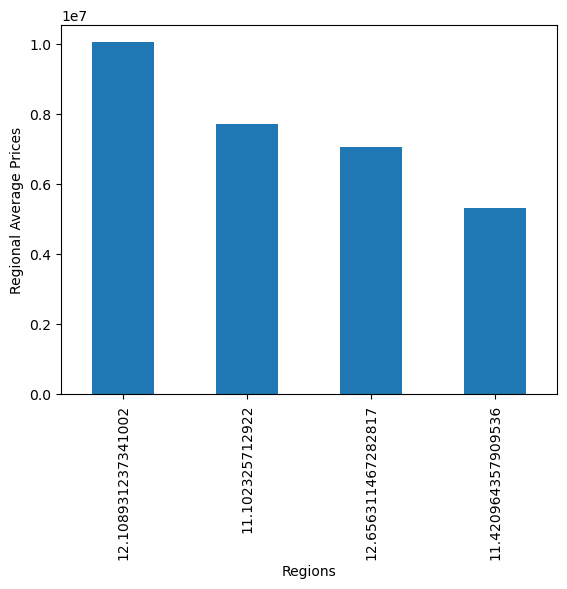

In [90]:
DF['Regional Average Prices'].value_counts().plot.bar()


In [ ]:
Midwest	12.656311
Northeast	11.420964
South	12.108931
West	11.102326

In [16]:
DF.columns

Index(['Order_ID', 'User_ID', 'Order_Number', 'Order_Days_Of_Week',
       'Order_Hours', 'Days_Since_Prior_Order', 'Product_ID',
       'Add_To_Cart_Order', 'Reordered', 'Product_Name', 'Aisle_ID',
       'Department_ID', 'Prices', 'Price_Range_Loc', 'Busiest_Day',
       'Busiest_Period_Of_Day', 'Max_Order', 'Loyalty_Flag',
       'Average_Price_Of_Orders', 'Spender_Type', 'Customer_Frequency',
       'Median_days_since_prior_order', 'Gender', 'State', 'Age',
       'Date_Joined', 'N_Dependants', 'Fam_Status', 'Income', 'Region',
       'Activity_Level'],
      dtype='object')

In [17]:
DF['Price_Range_Loc'].value_counts(dropna = False)

Price_Range_Loc
Mid-range product     20357410
Low-range product      9427299
High-range product      386721
Name: count, dtype: int64

Text(0, 0.5, 'Count of product range')

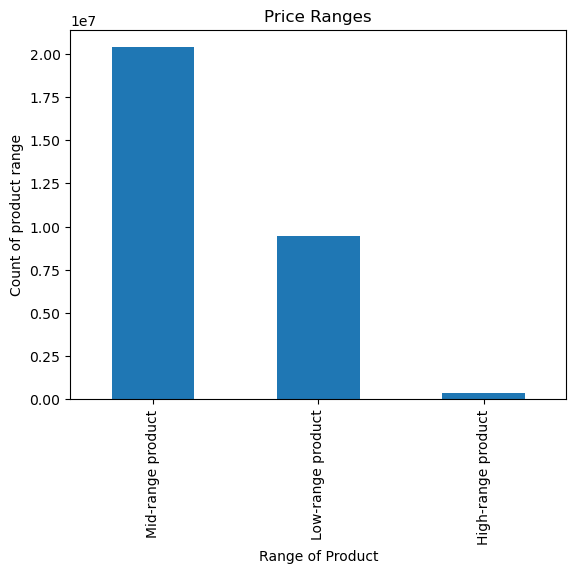

In [18]:
DF['Price_Range_Loc'].value_counts().plot.bar()
plt.title("Price Ranges")
plt.xlabel("Range of Product")
plt.ylabel("Count of product range")

# Step 9 - Visualization 1 (Consumer Ages - Histogram)
# What age is our customers?

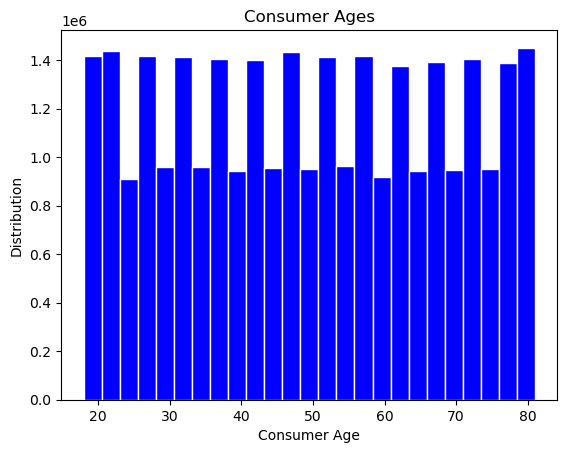

In [96]:
# creating histogram object to show distribution of consumer ages to determine flag criteria
Age_Histogram = DF['Age'].plot.hist(title='Consumer Ages', xlabel='Consumer Age', ylabel='Distribution', color='blue', edgecolor='white',bins =25)
plt.show()

# Step 9 - Visualization 2 (Customer Identity - Bar)
# Who are our most frequent shoppers?

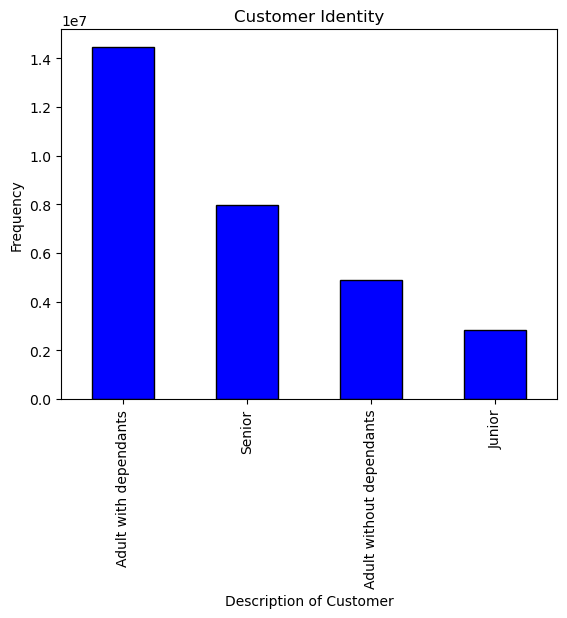

In [98]:
#We want to know more about our customer than age, how about thier age and dependant situation

Customer_Identity = DF['Customer Identity'].value_counts()[:100].plot.bar(title='Customer Identity', xlabel='Description of Customer', ylabel='Frequency', color='Blue', edgecolor='black')
plt.show()

# Step 9 - Visualization 3 (Average Prices by Region)
# Which region spends more money on average?

/Users/winsontom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/winsontom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/winsontom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


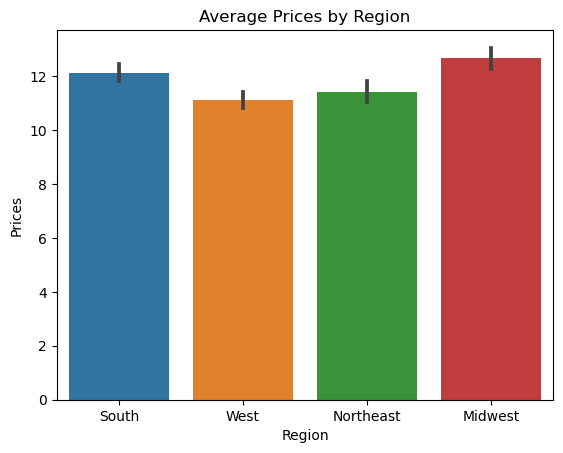

In [108]:
sns.barplot(x = 'Region',
            y = 'Prices',
            estimator= np.mean,
            data = DF)

plt.title("Average Prices by Region")
plt.show()

## Which region has higher revenue? Previous chart answered the per item differences, how about the total sum of all the spendings differences?

In [15]:
DF_Testing = pd.read_pickle (r'/Users/winsontom/Desktop/10-2023 Instacart Basket Analysis/02 Data /Prepared Data/Task 10 - step 4.pkl') 

In [16]:
DF_Testing['Total Spending'] = 'Values'

In [17]:
DF_Testing.columns

Index(['Order_ID', 'User_ID', 'Order_Number', 'Order_Days_Of_Week',
       'Order_Hours', 'Days_Since_Prior_Order', 'Product_ID',
       'Add_To_Cart_Order', 'Reordered', 'Product_Name', 'Aisle_ID',
       'Department_ID', 'Prices', 'Price_Range_Loc', 'Busiest_Day',
       'Busiest_Period_Of_Day', 'Max_Order', 'Loyalty_Flag',
       'Average_Price_Of_Orders', 'Spender_Type', 'Customer_Frequency',
       'Median_days_since_prior_order', 'Gender', 'State', 'Age',
       'Date_Joined', 'N_Dependants', 'Fam_Status', 'Income', 'Region',
       'Activity_Level', 'Total Spending'],
      dtype='object')

In [19]:
DF_Testing['Total Spending'] = DF_Testing.groupby(['User_ID'])['Prices'].transform(np.sum)

/var/folders/yj/v30db1v90zs0p0pvttp796cm0000gp/T/ipykernel_7771/4234322693.py:1: FutureWarning: The provided callable <function sum at 0x10ec24c20> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  DF_Testing['Total Spending'] = DF_Testing.groupby(['User_ID'])['Prices'].transform(np.sum)


In [ ]:
DF_Testing['Total Spending'].head(100)

/Users/winsontom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/winsontom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/winsontom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


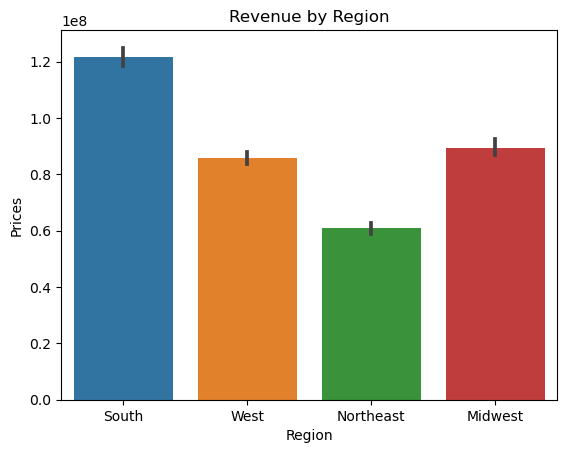

In [22]:
sns.barplot(x = 'Region',
            y = 'Prices',
            estimator= np.sum,
            data = DF_Testing)

plt.title("Revenue by Region")
plt.show()

In [24]:
DF.groupby(['Region'])['Prices'].sum()

Region
Midwest       89481678.8
Northeast     60809223.0
South        121696744.8
West          85785361.5
Name: Prices, dtype: float64

# Step 9 - Visualization 4 (Average Prices by Region w. Customer Identity)
# Further Elaborarting on Visual 

/var/folders/yj/v30db1v90zs0p0pvttp796cm0000gp/T/ipykernel_823/2297156207.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = DF,
/Users/winsontom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/winsontom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/winsontom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vect

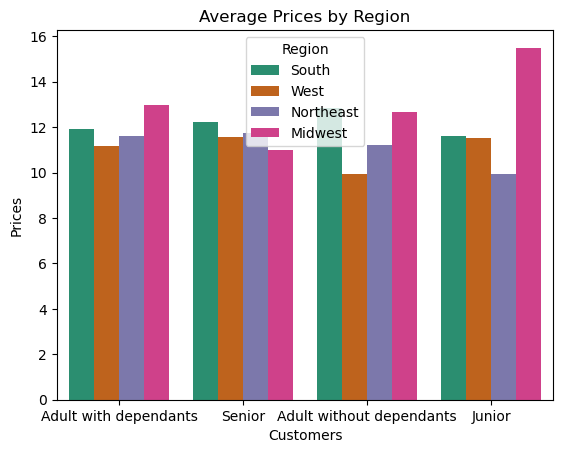

In [105]:
sns.barplot(data = DF, 
             x='Customer Identity',          
             y = 'Prices', 
             hue='Region', 
             palette = 'Dark2',
             estimator= np.mean,
             ci=None
            )

plt.title("Average Prices by Region")
plt.xlabel("Customers")
plt.ylabel("Prices")
plt.show()

In [25]:
DF['Total Spending'] = 'Values'

In [26]:
DF['Total Spending'] = DF.groupby(['User_ID'])['Prices'].transform(np.sum)

/var/folders/yj/v30db1v90zs0p0pvttp796cm0000gp/T/ipykernel_5521/1462691597.py:1: FutureWarning: The provided callable <function sum at 0x10f058c20> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  DF['Total Spending'] = DF.groupby(['User_ID'])['Prices'].transform(np.sum)


In [ ]:
DF['Total Spending'].head(100)

In [27]:
DF.columns

Index(['Order_ID', 'User_ID', 'Order_Number', 'Order_Days_Of_Week',
       'Order_Hours', 'Days_Since_Prior_Order', 'Product_ID',
       'Add_To_Cart_Order', 'Reordered', 'Product_Name', 'Aisle_ID',
       'Department_ID', 'Prices', 'Price_Range_Loc', 'Busiest_Day',
       'Busiest_Period_Of_Day', 'Max_Order', 'Loyalty_Flag',
       'Average_Price_Of_Orders', 'Spender_Type', 'Customer_Frequency',
       'Median_days_since_prior_order', 'Gender', 'State', 'Age',
       'Date_Joined', 'N_Dependants', 'Fam_Status', 'Income', 'Region',
       'Activity_Level', 'Total Spending'],
      dtype='object')

/var/folders/yj/v30db1v90zs0p0pvttp796cm0000gp/T/ipykernel_7771/1518144597.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = DF ,
/Users/winsontom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/winsontom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/winsontom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(ve

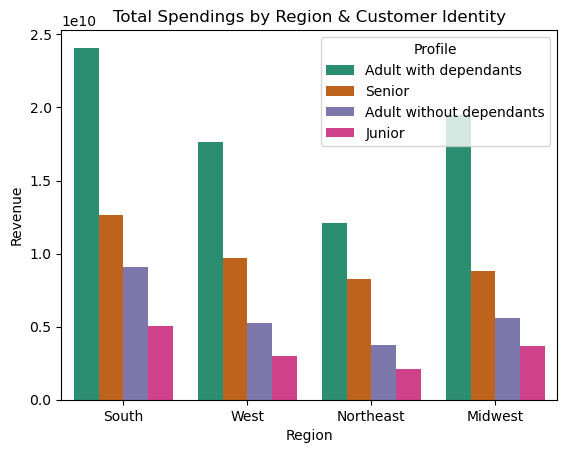

In [31]:
sns.barplot(data = DF , 
             x='Region',          
             y = 'Total Spending', 
             hue= 'Profile' , 
             palette = 'Dark2',
             estimator= np.sum,
             ci=None
            )

plt.title("Total Spendings by Region & Customer Identity")
plt.xlabel("Region")
plt.ylabel("Revenue")
plt.show()

In [37]:
DF.groupby(['Profile'])['Total Spending'].mean()

Profile
Adult with dependants       5072.691117
Adult without dependants    4854.607012
Junior                      4837.333443
Senior                      4926.865628
Name: Total Spending, dtype: float64

In [40]:
DF.groupby(['Profile'])['Total Spending'].sum()

Profile
Adult with dependants       7.332411e+10
Adult without dependants    2.365649e+10
Junior                      1.380590e+10
Senior                      3.936430e+10
Name: Total Spending, dtype: float64

/var/folders/yj/v30db1v90zs0p0pvttp796cm0000gp/T/ipykernel_5521/3529942979.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = DF ,
/Users/winsontom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/winsontom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/winsontom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(ve

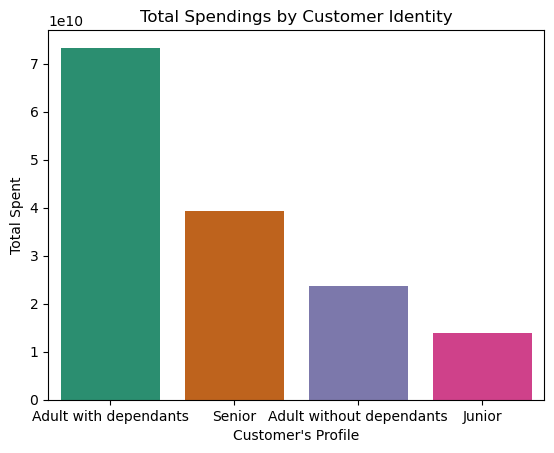

In [43]:
sns.barplot(data = DF , 
             x='Profile',          
             y = 'Total Spending',  
             palette = 'Dark2',
             estimator= np.sum,
             ci=None
            )

plt.title("Total Spendings by Customer Identity")
plt.xlabel("Customer's Profile")
plt.ylabel("Total Spent")
plt.show()

/var/folders/yj/v30db1v90zs0p0pvttp796cm0000gp/T/ipykernel_5521/1372637477.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = DF ,
/Users/winsontom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/winsontom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/winsontom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(ve

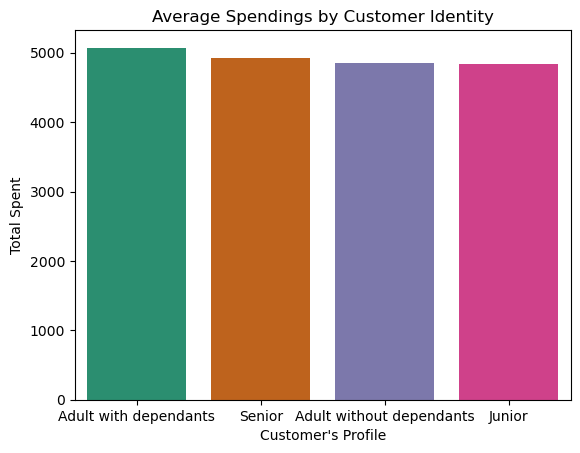

In [44]:
sns.barplot(data = DF , 
             x='Profile',          
             y = 'Total Spending',  
             palette = 'Dark2',
             estimator= np.mean,
             ci=None
            )

plt.title("Average Spendings by Customer Identity")
plt.xlabel("Customer's Profile")
plt.ylabel("Total Spent")
plt.show()

In [45]:
DF.groupby(['Profile'])['Total Spending'].mean()

Profile
Adult with dependants       5072.691117
Adult without dependants    4854.607012
Junior                      4837.333443
Senior                      4926.865628
Name: Total Spending, dtype: float64

In [46]:
DF.columns

Index(['Order_ID', 'User_ID', 'Order_Number', 'Order_Days_Of_Week',
       'Order_Hours', 'Days_Since_Prior_Order', 'Product_ID',
       'Add_To_Cart_Order', 'Reordered', 'Product_Name', 'Aisle_ID',
       'Department_ID', 'Prices', 'Price_Range_Loc', 'Busiest_Day',
       'Busiest_Period_Of_Day', 'Max_Order', 'Loyalty_Flag',
       'Average_Price_Of_Orders', 'Spender_Type', 'Customer_Frequency',
       'Median_days_since_prior_order', 'Gender', 'State', 'Age',
       'Date_Joined', 'N_Dependants', 'Fam_Status', 'Income', 'Region',
       'Activity_Level', 'Total Spending', 'Profile'],
      dtype='object')

In [ ]:
DF.groupby(['Loyalty_Flag'])['Order_Hours'].mean()

In [50]:
DF['Loyalty_Flag'].head(100)

0         New customer
1         New customer
2         New customer
3         New customer
4         New customer
            ...       
95    Regular customer
96    Regular customer
97    Regular customer
98    Regular customer
99    Regular customer
Name: Loyalty_Flag, Length: 100, dtype: object

/Users/winsontom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/winsontom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/winsontom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


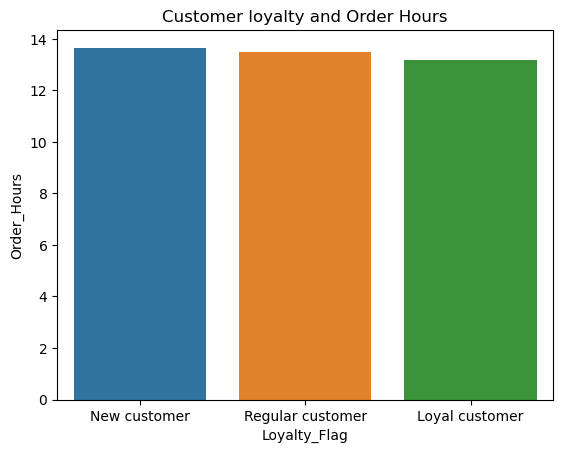

In [51]:
sns.barplot(x = 'Loyalty_Flag',
            y = 'Order_Hours',
            estimator= np.mean,
            data = DF)

plt.title("Customer loyalty and Order Hours")
plt.show()

# Step 9 - Visualization 5 (Region and Income)
# What is the difference in most frequent income based on the customer's region?

/Users/winsontom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/winsontom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/winsontom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


## Additional Steps for answering stakeholder's questions
## What the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders.


In [6]:
DF.columns

Index(['Order_ID', 'User_ID', 'Order_Number', 'Order_Days_Of_Week',
       'Order_Hours', 'Days_Since_Prior_Order', 'Product_ID',
       'Add_To_Cart_Order', 'Reordered', 'Product_Name', 'Aisle_ID',
       'Department_ID', 'Prices', 'Price_Range_Loc', 'Busiest_Day',
       'Busiest_Period_Of_Day', 'Max_Order', 'Loyalty_Flag',
       'Average_Price_Of_Orders', 'Spender_Type', 'Customer_Frequency',
       'Median_days_since_prior_order', 'Gender', 'State', 'Age',
       'Date_Joined', 'N_Dependants', 'Fam_Status', 'Income', 'Region',
       'Activity_Level'],
      dtype='object')

Text(0, 0.5, 'Frequency')

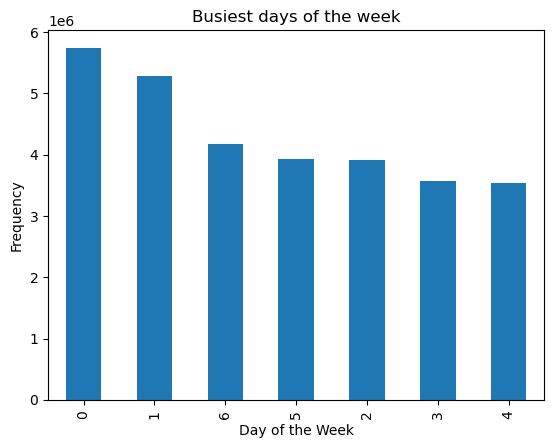

In [9]:
DF['Order_Days_Of_Week'].value_counts().plot.bar()
plt.title("Busiest days of the week")
plt.xlabel("Day of the Week")
plt.ylabel("Frequency")